In [1]:
# importing 
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer


[nltk_data] Downloading package stopwords to C:\Users\Debjeet
[nltk_data]     Das\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\Debjeet
[nltk_data]     Das\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [18]:
# dataset loaded
import pandas as pd
imdb = pd.read_csv("imdb_sentiment.csv")
imdb

,review,sentiment
0,"A very, very, very slow-moving, aimless movie ...",0
1,Not sure who was more lost - the flat characte...,0
2,Attempting artiness with black & white and cle...,0
3,Very little music or anything to speak of.,0
4,The best scene in the movie was when Gerardo i...,1
...,...,...
743,I just got bored watching Jessice Lange take h...,0
744,"Unfortunately, any virtue in this film's produ...",0
745,"In a word, it is embarrassing.",0
746,Exceptionally bad!,0


In [19]:
# Creating customized stop words
# NOte that the column in the dataset where the reviews are,should be named as review in order to make this udf work:
def clean_data(x):
    from string import punctuation
    stp_wrds = stopwords.words("english")

    stp=["movie","film","one","end","show","minute","could","way","many","still","screen"]
    stp_wrds.extend(stp)


    import re
    from nltk.tokenize import word_tokenize
    words=[]
    sentence = []
    for i in range(len(x.review)):
        word =re.sub("[^a-zA-Z]"," ",x.review[i]) # here we are removing the punctuations
        word = word.lower()  # making all the words to lower case lower
        word = word_tokenize(word) # tokenising words from sentences

        # here we are removing all the stopwords and words of len less than 2
        lem=WordNetLemmatizer()
        w=[]
        for j in word :
            if j not in set(stp_wrds) :
                w.append(lem.lemmatize(j)) # Here we are lemmatizing the words so as to get meaningful words with least alphabets

        # here we are creating sentences from those leammatised words
        ls=[]
        for k in w:
            if len(k)>2:
                ls.append(k)
                words.append(k)   
        sentence.append(" ".join(ls))
    return (sentence,words)

In [20]:
# Here we are storing all the sentences in sent and words in word
sent,word=clean_data(imdb)

# Adding Clean sentences to the dataset
imdb["clean_review"]=sent

In [21]:
# this is the final dataframe with clean reviews
imdb

,review,sentiment,clean_review
0,"A very, very, very slow-moving, aimless movie ...",0,slow moving aimless distressed drifting young man
1,Not sure who was more lost - the flat characte...,0,sure lost flat character audience nearly half ...
2,Attempting artiness with black & white and cle...,0,attempting artiness black white clever camera ...
3,Very little music or anything to speak of.,0,little music anything speak
4,The best scene in the movie was when Gerardo i...,1,best scene gerardo trying find song keep runni...
...,...,...,...
743,I just got bored watching Jessice Lange take h...,0,got bored watching jessice lange take clothes
744,"Unfortunately, any virtue in this film's produ...",0,unfortunately virtue production work lost regr...
745,"In a word, it is embarrassing.",0,word embarrassing
746,Exceptionally bad!,0,exceptionally bad


In [37]:
# Deriving New Features

# This will create a new feature showing the count of words used in each review
imdb["review_word_count"]=imdb.clean_review.apply(lambda x: len(x.split()))
imdb
# Now we will be adding the percentage of punctuations used in the original review
#import string
#count_punctuation = [1 for i in imdb.review if i in string.punctuation]
#imdb["review_punc_%"] = imdb.review.apply(lambda x : )

,review,sentiment,clean_review,review_word_count
0,"A very, very, very slow-moving, aimless movie ...",0,slow moving aimless distressed drifting young man,7
1,Not sure who was more lost - the flat characte...,0,sure lost flat character audience nearly half ...,8
2,Attempting artiness with black & white and cle...,0,attempting artiness black white clever camera ...,18
3,Very little music or anything to speak of.,0,little music anything speak,4
4,The best scene in the movie was when Gerardo i...,1,best scene gerardo trying find song keep runni...,9
...,...,...,...,...
743,I just got bored watching Jessice Lange take h...,0,got bored watching jessice lange take clothes,7
744,"Unfortunately, any virtue in this film's produ...",0,unfortunately virtue production work lost regr...,7
745,"In a word, it is embarrassing.",0,word embarrassing,2
746,Exceptionally bad!,0,exceptionally bad,2


In [6]:
# This is list of lemmatized words
word

['slow',
 'moving',
 'aimless',
 'distressed',
 'drifting',
 'young',
 'man',
 'sure',
 'lost',
 'flat',
 'character',
 'audience',
 'nearly',
 'half',
 'walked',
 'attempting',
 'artiness',
 'black',
 'white',
 'clever',
 'camera',
 'angle',
 'disappointed',
 'became',
 'even',
 'ridiculous',
 'acting',
 'poor',
 'plot',
 'line',
 'almost',
 'non',
 'existent',
 'little',
 'music',
 'anything',
 'speak',
 'best',
 'scene',
 'gerardo',
 'trying',
 'find',
 'song',
 'keep',
 'running',
 'head',
 'rest',
 'lack',
 'art',
 'charm',
 'meaning',
 'emptiness',
 'work',
 'guess',
 'empty',
 'wasted',
 'two',
 'hour',
 'saw',
 'today',
 'thought',
 'good',
 'effort',
 'good',
 'message',
 'kid',
 'bit',
 'predictable',
 'loved',
 'casting',
 'jimmy',
 'buffet',
 'science',
 'teacher',
 'baby',
 'owl',
 'adorable',
 'showed',
 'lot',
 'florida',
 'best',
 'made',
 'look',
 'appealing',
 'song',
 'best',
 'muppets',
 'hilarious',
 'cool',
 'right',
 'case',
 'delivers',
 'everything',
 'almost',

In [12]:
# this is the list of sentences
sent

['slow moving aimless distressed drifting young man',
 'sure lost flat character audience nearly half walked',
 'attempting artiness black white clever camera angle disappointed became even ridiculous acting poor plot line almost non existent',
 'little music anything speak',
 'best scene gerardo trying find song keep running head',
 'rest lack art charm meaning emptiness work guess empty',
 'wasted two hour',
 'saw today thought good effort good message kid',
 'bit predictable',
 'loved casting jimmy buffet science teacher',
 'baby owl adorable',
 'showed lot florida best made look appealing',
 'song best muppets hilarious',
 'cool',
 'right case delivers everything almost right face',
 'average acting main person low budget clearly see',
 'review long overdue since consider tale two sister single greatest ever made',
 'put gem term screenplay cinematography acting post production editing directing aspect making',
 'practically perfect true masterpiece sea faux masterpiece',
 'structu

### WordCloud :

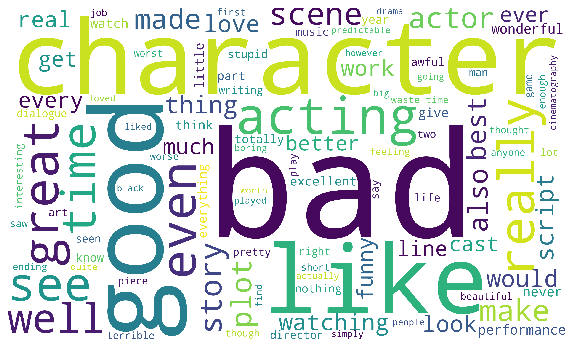

In [7]:
# Here we are updating the list of stopwords

import matplotlib.pyplot as plt
from wordcloud import WordCloud

from string import punctuation
stp_wrds = stopwords.words("english")
stp=["movie","film","one","end","show","minute","could","way","many","still","screen"]
stp_wrds.extend(stp)


# Creating a single big_string wich will be used for generating the wordcloud
single = " ".join(word)

# creating wordcloud
wordcloud = WordCloud(stopwords=stp_wrds,width=1000,height=600,scale=3,background_color="white",max_words=100).generate(single)
plt.figure(figsize=(10,10))
plt.axis("off")
plt.imshow(wordcloud)

In [8]:
# creating df and then checking frequency of each word
import numpy as np
df=pd.DataFrame({"words":word})
x=df["words"].value_counts().head(20)

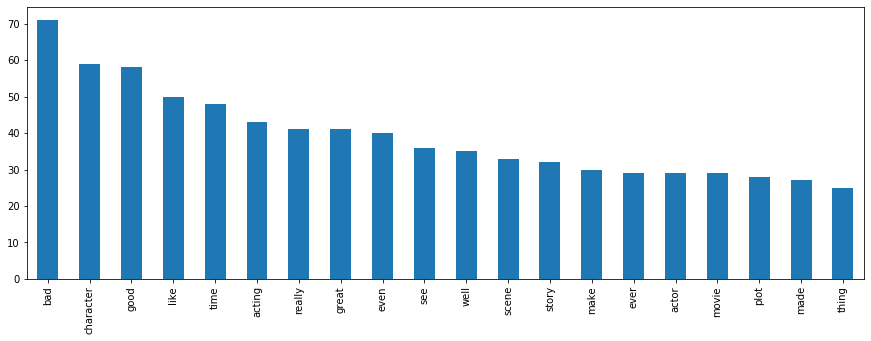

In [9]:
# Plotting the frequency count of the most used words
plt.figure(figsize=(15,5))
x.plot(kind="bar")

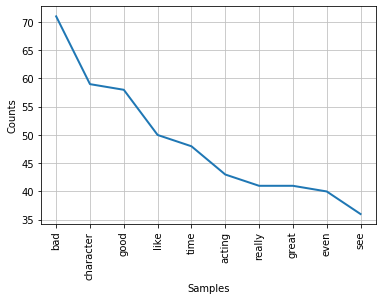

In [10]:
#  checking frequency distribution of top ten words on the basis of their occurence 
freq_words = nltk.FreqDist(word)
freq_words.plot(10)

## Creating TF-IDF Matrix:
   - This matrix will consist of each unique word as a feature
   - The row index corresponds to the sentence number.
   - And the values in the cell consists of the TF-IDF Values.
   - **TF-IDF** :
        - Here the uncommon words will be given higher importance than the common words
        - Here we will be having calculating the TF & IDF values for each word.
        - TF("Term Frequency") = No. of occurence of that word in that sentence/Total no. of words in that sentence
        - IDF("Inverse Document Frequency")= log(Total no. of sentences/No. of sentences containing that word)
        - So the TF-IDF = TF*IDF (for each word)
        - These values then will be filled in the cells corresponding to the words in a particular sentence.
   - **NGram** :
        - There are Unigram ,Bigram & Trigram Where we will be using pair or a trio of words togetherfor analysis.
        - Bigram refers to the pair of words together used as a feature in the matrix.
        - Trigram refers to three words used together as a single feature in th Matrix.
        - We can have n numbers of words together as a feature and this would reduce the no. of features than that of Uni and Bigram.

In [15]:
# Creating TF-IDF Matrix

from sklearn.feature_extraction.text import TfidfVectorizer
tf= TfidfVectorizer(ngram_range=(2,2)) # Here Bigram is used.But if we use (1,3) than all Unique Uni,Bi & Trigrams will be generated
Y= tf.fit_transform(sent).toarray()
Y.shape

# creating a dataframe & Adding the target variable to the data frame
IMDB_df_TF= pd.DataFrame(Y,columns=tf.get_feature_names())
IMDB_df_TF["Sentiment"]=imdb["sentiment"]
IMDB_df_TF

,aailiyah pretty,abandoned factory,ability dwight,ability meld,ability pull,abroad interacting,absolutely abysmal,absolutely appalling,absolutely hilarious,absolutely loved,...,young man,young played,younger set,youthful energy,yun fat,zillion time,zombie movie,zombie student,zombiez part,Sentiment
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.412171,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
743,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
744,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
745,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
746,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
